In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [3]:
PATH_DATASET_DAILY = '../../data/prepared/bicimad_daily.csv'
dataset_daily = pd.read_csv(PATH_DATASET_DAILY)

In [7]:
dataset_daily.head(2)

,day_of_week,rides,tmed,prec,velmedia
0,Sat,9762,27.3,0.0,1.1
1,Sun,9882,27.5,1.2,1.7


In [13]:
weekday_dict = {
    'Mon': 0,
    'Tue': 0,
    'Wed': 0,
    'Thu': 0,
    'Fri': 0,
    'Sat': 1,
    'Sun': 1
}

In [14]:
dataset_daily['weekday'] = dataset_daily['day_of_week'].map(weekday_dict)

In [27]:
from sklearn.model_selection import train_test_split

target = 'rides'
categorical = ['day_of_week', 'weekday']
dataset_daily_2 = pd.get_dummies(dataset_daily, columns=categorical)
dataset_daily_3 = dataset_daily_2[['rides', 'tmed', 'prec', 'velmedia', 'weekday_0', 'weekday_1']]
train, test = train_test_split(dataset_daily_3, test_size=0.3)
features = ['velmedia', 'tmed', 'prec', 'weekday_0', 'weekday_1']

In [29]:
train[features].head()

,velmedia,tmed,prec,weekday_0,weekday_1
10,1.9,23.0,0.0,1,0
9,1.9,22.8,0.0,1,0
22,1.4,27.2,0.0,0,1
16,1.9,24.7,1.2,1,0
26,0.3,21.0,0.0,1,0


In [26]:
lr = linear_model.LinearRegression()
lr

LinearRegression()

In [30]:
lr.fit(train[features], train[target])

LinearRegression()

In [31]:
lr.score(train[features], train[target])

0.2884342852577437

In [34]:
import math

predictions = lr.predict(test[features])
rmse=math.sqrt(metrics.mean_squared_error(test[target],predictions))
mae=metrics.mean_absolute_error(test[target],predictions)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 2023.7403243544632
Mean absolute error : 1781.3893927938673


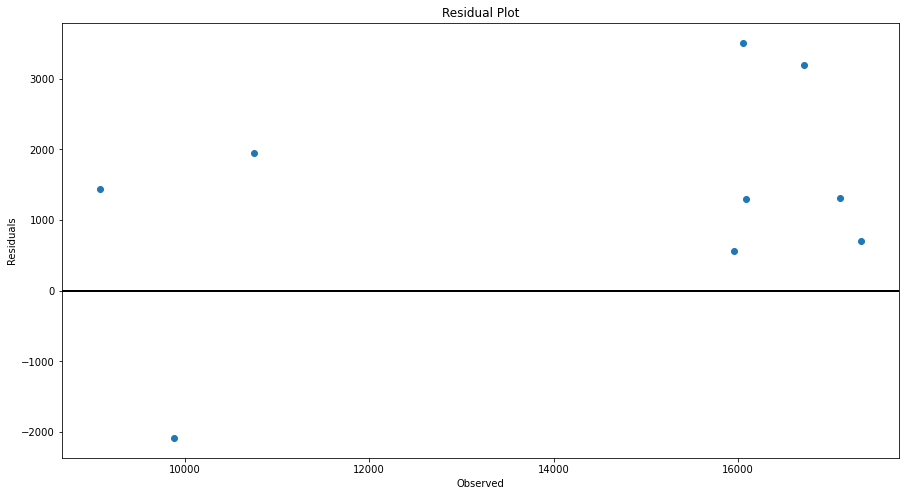

In [35]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(test[target], test[target]-predictions)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In [ ]:
lr.predict(test[features])

In [18]:
categorical = ['day_of_week', 'weekday']

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [37]:
dtr.fit(train[features], train[target])

DecisionTreeRegressor(max_leaf_nodes=10)

In [38]:
dtr.score(train[features], train[target])

0.9937800528279194

In [45]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ModuleNotFoundError: No module named 'graphviz'

In [40]:
predictions = dtr.predict(test[features])
rmse=math.sqrt(metrics.mean_squared_error(test[target],predictions))
mae=metrics.mean_absolute_error(test[target],predictions)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 1112.5036641637535
Mean absolute error : 785.6111111111111


In [43]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)
rf.fit(train[features], train[target])

RandomForestRegressor(n_estimators=200)

In [44]:
rf.score(train[features], train[target])

0.8324618693599496

In [98]:
df_hourly

,day_of_week,rides,mean_for_weekday,tmed,prec,velmedia,tmax,tmin,weekend
0,Sat,8232,9161.00,27.3,0.0,1.1,"33,6","21,0",1
1,Sun,8164,9269.25,27.5,1.2,1.7,"34,8","20,2",1
2,Mon,12472,13218.50,26.8,0.0,1.7,"31,3","22,3",1
3,Tue,13738,14296.50,24.4,0.0,1.4,"29,5","19,4",1
4,Wed,13959,14556.00,23.0,0.0,2.8,"27,8","18,3",1
5,Thu,14197,14939.75,22.6,0.0,0.6,"27,4","17,8",1
6,Fri,12456,10908.25,22.2,5.1,2.2,"28,5","16,0",1
7,Sat,7680,9161.00,20.2,1.8,1.7,"23,6","16,9",1
8,Sun,9035,9269.25,21.0,0.0,0.8,"26,3","15,8",1
9,Mon,13466,13218.50,22.8,0.0,1.9,"28,3","17,3",1


In [100]:
df_hourly['weekend'] = df_hourly.apply(lambda row: 1 if row['day_of_week'] in ['Sat', 'Sun'] else 0, axis=1)

In [101]:
df_hourly

,day_of_week,rides,mean_for_weekday,tmed,prec,velmedia,tmax,tmin,weekend
0,Sat,8232,9161.00,27.3,0.0,1.1,"33,6","21,0",1
1,Sun,8164,9269.25,27.5,1.2,1.7,"34,8","20,2",1
2,Mon,12472,13218.50,26.8,0.0,1.7,"31,3","22,3",0
3,Tue,13738,14296.50,24.4,0.0,1.4,"29,5","19,4",0
4,Wed,13959,14556.00,23.0,0.0,2.8,"27,8","18,3",0
5,Thu,14197,14939.75,22.6,0.0,0.6,"27,4","17,8",0
6,Fri,12456,10908.25,22.2,5.1,2.2,"28,5","16,0",0
7,Sat,7680,9161.00,20.2,1.8,1.7,"23,6","16,9",1
8,Sun,9035,9269.25,21.0,0.0,0.8,"26,3","15,8",1
9,Mon,13466,13218.50,22.8,0.0,1.9,"28,3","17,3",0


In [110]:
df_daily = pd.read_csv('/home/irene/dev/keepler-prueba/keepler-bicimad/data/prepared/bicimad_daily.csv')

In [111]:
df_daily.head()

,day_of_week,rides,weekend,mean_for_weekday,tmed,prec,velmedia,tmax,tmin
0,Sat,8232,weekend,9161.00,27.3,0.0,1.1,"33,6","21,0"
1,Sun,8164,weekend,9269.25,27.5,1.2,1.7,"34,8","20,2"
2,Mon,12472,weekday,13218.50,26.8,0.0,1.7,"31,3","22,3"
3,Tue,13738,weekday,14296.50,24.4,0.0,1.4,"29,5","19,4"
4,Wed,13959,weekday,14556.00,23.0,0.0,2.8,"27,8","18,3"


In [113]:
df_hourly = pd.read_csv('/home/irene/dev/keepler-prueba/keepler-bicimad/data/prepared/bicimad_hourly.csv')
df_hourly.head()

,day_of_week,hour,rides,weekend,mean_for_weekday_and_hour,tmax,tmin,rain,wind,temp
0,Sat,1,456,weekend,470.00,"33,6","21,0",0.0,1.1,"21,0"
1,Sat,2,342,weekend,396.50,"33,6","21,0",0.0,1.1,"21,0"
2,Sat,3,275,weekend,293.25,"33,6","21,0",0.0,1.1,"21,0"
3,Sat,4,183,weekend,190.25,"33,6","21,0",0.0,1.1,"21,0"
4,Sat,5,137,weekend,151.75,"33,6","21,0",0.0,1.1,"21,0"


In [67]:
mean_for_weekday_and_hour.get(df_hourly['day_of_week'], df_hourly['hour'])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [65]:
(df_hourly['day_of_week'], df_hourly['hour']).map(mean_for_weekday_and_hour)

AttributeError: 'tuple' object has no attribute 'map'

In [78]:
mean_for_weekday_and_hour = df_hourly.groupby(['day_of_week', 'hour'])['rides'].mean().to_dict()

In [83]:
mean_for_weekday_and_hour.get(('Fri', 0))

508.5

In [82]:
mean_for_weekday_and_hour

{('Fri', 0): 508.5,
 ('Fri', 1): 295.75,
 ('Fri', 2): 178.25,
 ('Fri', 3): 107.5,
 ('Fri', 4): 75.75,
 ('Fri', 5): 71.5,
 ('Fri', 6): 106.5,
 ('Fri', 7): 512.25,
 ('Fri', 8): 882.25,
 ('Fri', 9): 887.0,
 ('Fri', 10): 471.6666666666667,
 ('Fri', 11): 435.3333333333333,
 ('Fri', 12): 503.6666666666667,
 ('Fri', 13): 612.0,
 ('Fri', 14): 1095.6666666666667,
 ('Fri', 15): 1204.0,
 ('Fri', 16): 811.0,
 ('Fri', 17): 767.6666666666666,
 ('Fri', 18): 798.3333333333334,
 ('Fri', 19): 857.6666666666666,
 ('Fri', 20): 775.0,
 ('Fri', 21): 703.6666666666666,
 ('Fri', 22): 542.6666666666666,
 ('Fri', 23): 428.0,
 ('Mon', 0): 300.0,
 ('Mon', 1): 159.25,
 ('Mon', 2): 96.5,
 ('Mon', 3): 53.75,
 ('Mon', 4): 46.5,
 ('Mon', 5): 48.5,
 ('Mon', 6): 104.25,
 ('Mon', 7): 462.5,
 ('Mon', 8): 1129.0,
 ('Mon', 9): 861.5,
 ('Mon', 10): 422.5,
 ('Mon', 11): 389.25,
 ('Mon', 12): 421.5,
 ('Mon', 13): 569.25,
 ('Mon', 14): 918.0,
 ('Mon', 15): 920.75,
 ('Mon', 16): 737.75,
 ('Mon', 17): 819.75,
 ('Mon', 18): 1194.7

In [81]:
mean_for_weekday_and_hour.get('Fri', 0)

0

In [70]:
mean_for_weekday_and_hour['Fri'][0]

508.5

In [72]:
df = df_hourly

In [77]:
df['mean_for_weekday_and_hour'] = mean_for_weekday_and_hour[df['day_of_week']][0]

TypeError: Expected tuple, got str

In [74]:
df

,date,day_of_week,hour,rides,mean_for_weekday_and_hour,horatmin,tmax,tmin,rain,wind,temp
0,2018-09-01,Sat,1,456,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
1,2018-09-01,Sat,2,342,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
2,2018-09-01,Sat,3,275,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
3,2018-09-01,Sat,4,183,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
4,2018-09-01,Sat,5,137,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
...,...,...,...,...,...,...,...,...,...,...,...
651,2018-09-28,Fri,4,51,NaN,6,"27,8","16,0",0.0,1.4,"16,0"
652,2018-09-28,Fri,5,70,NaN,6,"27,8","16,0",0.0,1.4,"16,0"
653,2018-09-28,Fri,6,112,NaN,6,"27,8","16,0",0.0,1.4,"16,0"
654,2018-09-28,Fri,7,533,NaN,6,"27,8","16,0",0.0,1.4,21.899999618530273


In [62]:
df_hourly.head(30)

,date,day_of_week,hour,rides,mean_for_weekday_and_hour,horatmin,tmax,tmin,rain,wind,temp
0,2018-09-01,Sat,1,456,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
1,2018-09-01,Sat,2,342,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
2,2018-09-01,Sat,3,275,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
3,2018-09-01,Sat,4,183,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
4,2018-09-01,Sat,5,137,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
5,2018-09-01,Sat,6,116,NaN,6,"33,6","21,0",0.0,1.1,"21,0"
6,2018-09-01,Sat,7,89,NaN,6,"33,6","21,0",0.0,1.1,27.299999237060547
7,2018-09-01,Sat,8,130,NaN,6,"33,6","21,0",0.0,1.1,27.299999237060547
8,2018-09-01,Sat,9,213,NaN,6,"33,6","21,0",0.0,1.1,27.299999237060547
9,2018-09-01,Sat,10,255,NaN,6,"33,6","21,0",0.0,1.1,27.299999237060547
